# Holt’s Winters Model


## Intro


In my recent videos, we have been discussing a very well known family of forecasting models, exponential smoothing. The fundamental principle of exponential smoothing is to put more weight on recent observations and less on historical observations as a means to forecast the time series.

The most basic exponential smoothing model is (funnily) simple exponentially smoothing also knows as single exponential smoothing. This model just forecasts the level of the time series and doesn’t take into account trend or seasonality.

The next step from this simple model is Holt’s linear trend method, which is also known as double exponential smoothing. Like its name suggests, this model incorporates the trend as well as the level.

Finally, the next step from Holt’s method is to find a way to to include seasonality in the exponential smoothing model. This is where Holt Winters (triple exponential smoothing) comes in!

## Holt Winters’ Model Theory

As stated above, the Holt Winters’ model further extends Holt’s linear trend method by adding seasonality to the forecast. The addition of seasonality gives rise to two different Holt Winters’ model, additive and multiplicative.

The difference between the two models is the size of the seasonality fluctuations. For an additive model the seasonality fluctuations are mostly constant. However, for multiplicative model the fluctuations are proportional to the value of the time series at that given time.

**Additive**

**Overall Equation:**  
$$
\hat{y}_{t+h} = l_t + h b_t + s_{t+h-m}
$$  

**Level Equation:**  
$$
l_t = \alpha (y_t - s_{t-m}) + (1 - \alpha)(l_{t-1} + b_{t-1})
$$  

**Trend Equation:**  
$$
b_t = \beta (l_t - l_{t-1}) + (1 - \beta)b_{t-1}
$$  

**Seasonality Equation:**  
$$
s_t = \gamma (y_t - l_{t-1} - b_{t-1}) + (1 - \gamma) s_{t-m}
$$

Where m is the seasonality of the time series, s_t is the seasonal forecast component, s_{t-m} is the forecast for the previous season and γ is the seasonal component smoothing factor (0 ≤ γ ≤ 1−α).

**Multiplicative**

Without going into the nuisances of these equations, what they are trying to do is calculate the trend line for the times series and weight the values on the trend line by the seasonal variations.


**Overall Equation:**  
$$
\hat{y}_{t+h} = (l_t + h b_t) s_{t+h-m}
$$  

**Level Equation:**  
$$
l_t = \alpha \frac{y_t}{s_{t-m}} + (1 - \alpha)(l_{t-1} + b_{t-1})
$$  

**Trend Equation:**  
$$
b_t = \beta (l_t - l_{t-1}) + (1 - \beta)b_{t-1}
$$  

**Seasonality Equation:**  
$$
s_t = \gamma \frac{y_t}{l_{t-1} + b_{t-1}} + (1 - \gamma)s_{t-m}
$$

## Implementing Holt Winters in Python



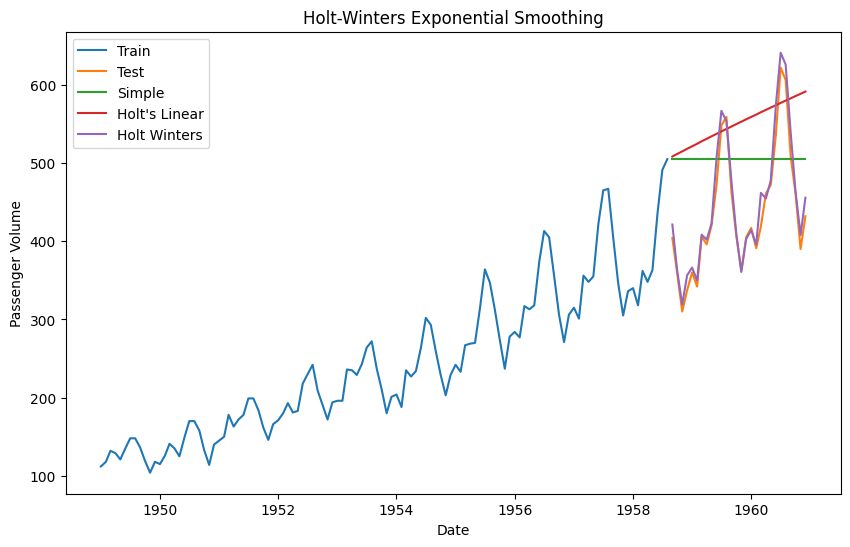

In [3]:
# Import packages
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import kagglehub
import matplotlib.pyplot as plt

# Read in the data
path = kagglehub.dataset_download("ashfakyeafi/air-passenger-data-for-time-series-analysis")
data = pd.read_csv(path + "/AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]


def plot_func(forecast1: list[float],
              forecast2: list[float],
              forecast3: list[float],
              title: str) -> None:
    #"""Function to plot the forecasts."""
    #fig = go.Figure()
    #fig.add_trace(go.Scatter(x=train['Month'], y=train['#Passengers'], name='Train'))
    #fig.add_trace(go.Scatter(x=test['Month'], y=test['#Passengers'], name='Train'))
    #fig.add_trace(go.Scatter(x=test['Month'], y=forecast1, name='Simple'))
    #fig.add_trace(go.Scatter(x=test['Month'], y=forecast2, name="Holt's Linear"))
    #fig.add_trace(go.Scatter(x=test['Month'], y=forecast3, name='Holt Winters'))
    #fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
    #                  width=700, title_x=0.5, height=400, xaxis_title='Date',
    #                  yaxis_title='Passenger Volume')
    #return fig.show()
    plt.figure(figsize=(10, 6))
    plt.plot(train['Month'], train['#Passengers'], label='Train')
    plt.plot(test['Month'], test['#Passengers'], label='Test')
    plt.plot(test['Month'], forecast1, label='Simple')
    plt.plot(test['Month'], forecast2, label="Holt's Linear")
    plt.plot(test['Month'], forecast3, label='Holt Winters')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Passenger Volume')
    plt.legend()
    plt.show()


# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['#Passengers']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

# Fit Holt's model and get forecasts
model_holt = Holt(train['#Passengers'], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(len(test))

# Fit Holt Winters model and get forecasts
model_holt_winters = ExponentialSmoothing(train['#Passengers'], trend='mul',
                                          seasonal='mul', seasonal_periods=12)\
                                          .fit(optimized=True)
forecasts_holt_winters = model_holt_winters.forecast(len(test))

# Plot the forecasts
plot_func(forecasts_simple, forecasts_holt, forecasts_holt_winters,  "Holt-Winters Exponential Smoothing")

From the above plot we see that the Holt Winters’ forecast is by far the best as it captures both the trend and seasonality of the time series.

When calling the model we passed parameters seasonal_periods, trend and seasonal to the model obejct. From the above plot, there is clearly a yearly seasonality, so we set seasonal_periods=12. Additionally, the trend is not quite straight line, so it is multiplicative, hence trend='multi'. Finally, the seasonal fluctuations are not some set consistent value but are proportional to the time series, therefore the seasonality is multiplicative seasonal='multi'.

In [2]:
print(model_holt_winters.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:              #Passengers   No. Observations:                  116
Model:             ExponentialSmoothing   SSE                          10336.896
Optimized:                         True   AIC                            552.827
Trend:                   Multiplicative   BIC                            596.884
Seasonal:                Multiplicative   AICC                           559.878
Seasonal Periods:                    12   Date:                 Sun, 15 Oct 2023
Box-Cox:                          False   Time:                         19:16:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3853826                alpha                 True
smoothing_trend          

The smoothing_level, α, and smoothing_seasonal, γ, parameters are relatively high indicating that the seasonality and level components vary frequently. However, the smoothing_trend, β, value is quite small meaning the trend doesn’t vary all that much.